<a href="https://colab.research.google.com/github/Homedepot5/DataScience/blob/origin%2Ffeature%2Fdevelopment/HRHigringTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install word2number

H R Hiring Test

In [67]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as  plt
from word2number import w2n

In [68]:
from google.colab import files
uploaded = files.upload()

Saving HrHiring.csv to HrHiring (1).csv


In [69]:
import io
df = pd.read_csv(io.BytesIO(uploaded['HrHiring.csv']))
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,NaN,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


Finding The meadian of test_score

In [70]:
import math

df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(math.floor(df['test_score(out of 10)'].median()))

df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,7.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [71]:
df['experience']=df['experience'].fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,7.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [72]:
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,7.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [86]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
reg.predict([[2,9,6]])


array([54044.41306979])

In [77]:
reg.predict([[12,10,10]])

array([93632.10972166])

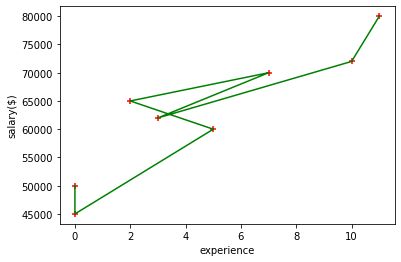

In [94]:
%matplotlib inline
plt.xlabel('experience')
plt.ylabel('salary($)')
df.rename(columns={"salary($)'": "sal"})

plt.scatter(df.experience,df.sal,color='red',marker='+')
plt.plot(df.experience,df.sal,color='green')